In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingRegressor

In [87]:
X,y=make_regression(n_samples=200,n_features=1,n_informative=1,n_targets=1,noise=40,random_state=42)

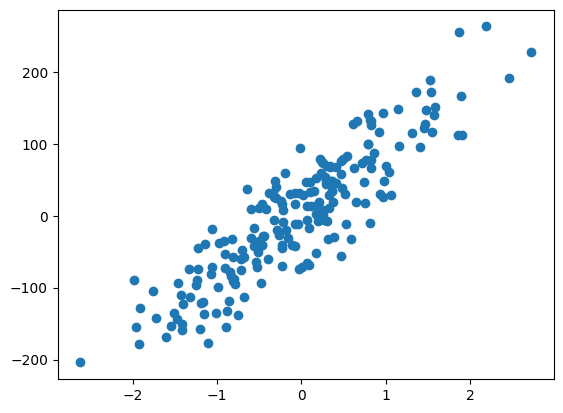

In [88]:
plt.scatter(X,y)
plt.show()

In [89]:
rg1=LinearRegression()
rg2=DecisionTreeRegressor()
rg3=SVR()

In [90]:
estimators=[("rg1",rg1),("rg2",rg2),("rg3",rg3)]

In [91]:
for estimator in estimators:
    X_test=cross_val_score(estimator[1],X,y,cv=10,scoring='r2')
    print(estimator[0],np.round(np.mean(X_test),2))

rg1 0.78
rg2 0.52
rg3 0.31


In [95]:
VR=VotingRegressor(estimators)
score=cross_val_score(VR,X,y,cv=10,scoring='r2')
print("voting Regressor",np.round(np.mean(score),2))

voting Regressor 0.69


In [93]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            VR=VotingRegressor(estimators,weights=[i,j,k])
            score=cross_val_score(VR,X,y,cv=10,scoring='r2')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(score),2))

for i=1,j=1,k=1 0.69
for i=1,j=1,k=2 0.64
for i=1,j=1,k=3 0.59
for i=1,j=2,k=1 0.67
for i=1,j=2,k=2 0.65
for i=1,j=2,k=3 0.62
for i=1,j=3,k=1 0.66
for i=1,j=3,k=2 0.65
for i=1,j=3,k=3 0.63
for i=2,j=1,k=1 0.73
for i=2,j=1,k=2 0.69
for i=2,j=1,k=3 0.65
for i=2,j=2,k=1 0.71
for i=2,j=2,k=2 0.69
for i=2,j=2,k=3 0.66
for i=2,j=3,k=1 0.69
for i=2,j=3,k=2 0.68
for i=2,j=3,k=3 0.67
for i=3,j=1,k=1 0.75
for i=3,j=1,k=2 0.72
for i=3,j=1,k=3 0.69
for i=3,j=2,k=1 0.73
for i=3,j=2,k=2 0.71
for i=3,j=2,k=3 0.69
for i=3,j=3,k=1 0.71
for i=3,j=3,k=2 0.7
for i=3,j=3,k=3 0.69


In [ ]:
dt1=DecisionTreeRegressor(max_depth=1)
dt2=DecisionTreeRegressor(max_depth=3)
dt3=DecisionTreeRegressor(max_depth=5)
dt4=DecisionTreeRegressor(max_depth=7)
dt5=DecisionTreeRegressor(max_depth=9)

In [120]:
estimator_list = [
    ("dt1", dt1),
    ("dt2", dt2),
    ("dt3", dt3),
    ("dt4", dt4),
    ("dt5", dt5)
]

# 3. Create the VotingRegressor (Optional, but kept as it was in original code structure)
vr = VotingRegressor(estimator_list)

# 4. Calculate cross-validated R^2 score for the SECOND estimator in the list (dt2)
# The original code used estimator1[1] which refers to the tuple ('dt2', dt2).
# To get the actual DecisionTreeRegressor object, you need the second element of the tuple: estimator_list[1][1]

# Corrected call to cross_val_score:
# Use estimator_list instead of the potentially confusing estimator1
target_estimator_tuple = estimator_list[1] # ('dt2', dt2)
target_estimator_name = target_estimator_tuple[0] # 'dt2'
target_estimator_model = target_estimator_tuple[1]

score = cross_val_score(
    target_estimator_model, # Correctly pass the estimator object (dt2)
    X,
    y,
    cv=10,
    scoring='r2')

print(np.round(np.mean(score),2))

0.73
